In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Download necessary resources
# nltk.download('stopwords')
# nltk.download('wordnet')

In [2]:
# Load the dataset
df = pd.read_csv('R:/IIT_MADRAS_DATA_SCINCE/DataSet/Healthcare Reviews/healthcare_reviews.csv')

In [3]:
df["Review_Text"]

0            I have mixed feelings about my experience. 
1      The staff was caring and attentive. I couldn't...
2            I have mixed feelings about my experience. 
3            I have mixed feelings about my experience. 
4      The healthcare provider was excellent. I had a...
                             ...                        
995    My experience was terrible. I would not recomm...
996    The service was disappointing. I won't be comi...
997      The service was okay, but nothing exceptional. 
998          I have mixed feelings about my experience. 
999    The staff was caring and attentive. I couldn't...
Name: Review_Text, Length: 1000, dtype: object

In [4]:
df.head()

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3


In [5]:
df.isnull().sum()

Review_Text    100
Rating           0
dtype: int64

In [6]:
# Handling Null values
df['Review_Text'] = df['Review_Text'].fillna('No review available')
df.isnull().sum()

Review_Text    0
Rating         0
dtype: int64

In [7]:
# df = df.dropna()
df.shape

(1000, 2)

In [8]:
df

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3
...,...,...
995,My experience was terrible. I would not recomm...,5
996,The service was disappointing. I won't be comi...,4
997,"The service was okay, but nothing exceptional.",3
998,I have mixed feelings about my experience.,5


# 1. Data Preprocessing

In [9]:
# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

#Apply preprocessing
df['cleaned_review'] = df['Review_Text'].apply(preprocess_text)

# Display sample cleaned data
df[['Review_Text', 'cleaned_review']].head()

,Review_Text,cleaned_review
0,I have mixed feelings about my experience.,mixed feeling experience
1,The staff was caring and attentive. I couldn't...,staff caring attentive couldnt happier
2,I have mixed feelings about my experience.,mixed feeling experience
3,I have mixed feelings about my experience.,mixed feeling experience
4,The healthcare provider was excellent. I had a...,healthcare provider excellent great experience


In [10]:
df['cleaned_review']

0                            mixed feeling experience
1              staff caring attentive couldnt happier
2                            mixed feeling experience
3                            mixed feeling experience
4      healthcare provider excellent great experience
                            ...                      
995      experience terrible would recommend provider
996            service disappointing wont coming back
997                  service okay nothing exceptional
998                          mixed feeling experience
999            staff caring attentive couldnt happier
Name: cleaned_review, Length: 1000, dtype: object

In [11]:
# Apply polarity to the 'Cleaned_Reviews' column
from textblob import TextBlob

df['Sentiment_Polarity'] = df['cleaned_review'].apply(lambda x: TextBlob((x)).sentiment.polarity)
df['Sentiment_Polarity']

0      0.000000
1      0.400000
2      0.000000
3      0.000000
4      0.900000
         ...   
995   -1.000000
996   -0.300000
997    0.583333
998    0.000000
999    0.400000
Name: Sentiment_Polarity, Length: 1000, dtype: float64

In [12]:
# Categorize sentiment into Positive, Neutral, and Negative
def categorize_sentiment(polarity):
    if polarity > 0:
        return 1
    elif polarity == 0:
        return 0
    else:
        return -1

# Apply the mapping function to create a new column 'Sentiment_Category'
df['Sentiment'] = df['Sentiment_Polarity'].apply(categorize_sentiment)
df['Sentiment']

0      0
1      1
2      0
3      0
4      1
      ..
995   -1
996   -1
997    1
998    0
999    1
Name: Sentiment, Length: 1000, dtype: int64

In [ ]:
# df.loc[df['Rating'] > 3, 'Sentiment'] = '1'
# df.loc[df['Rating'] == 3, 'Sentiment'] ='0'
# df.loc[df['Rating'] < 3, 'Sentiment'] = '-1'

In [13]:
df['Sentiment'].value_counts()

Sentiment
 1    515
-1    387
 0     98
Name: count, dtype: int64

In [14]:
df

,Review_Text,Rating,cleaned_review,Sentiment_Polarity,Sentiment
0,I have mixed feelings about my experience.,4,mixed feeling experience,0.000000,0
1,The staff was caring and attentive. I couldn't...,5,staff caring attentive couldnt happier,0.400000,1
2,I have mixed feelings about my experience.,5,mixed feeling experience,0.000000,0
3,I have mixed feelings about my experience.,5,mixed feeling experience,0.000000,0
4,The healthcare provider was excellent. I had a...,3,healthcare provider excellent great experience,0.900000,1
...,...,...,...,...,...
995,My experience was terrible. I would not recomm...,5,experience terrible would recommend provider,-1.000000,-1
996,The service was disappointing. I won't be comi...,4,service disappointing wont coming back,-0.300000,-1
997,"The service was okay, but nothing exceptional.",3,service okay nothing exceptional,0.583333,1
998,I have mixed feelings about my experience.,5,mixed feeling experience,0.000000,0


In [15]:
df['cleaned_review']


0                            mixed feeling experience
1              staff caring attentive couldnt happier
2                            mixed feeling experience
3                            mixed feeling experience
4      healthcare provider excellent great experience
                            ...                      
995      experience terrible would recommend provider
996            service disappointing wont coming back
997                  service okay nothing exceptional
998                          mixed feeling experience
999            staff caring attentive couldnt happier
Name: cleaned_review, Length: 1000, dtype: object

In [15]:
# df['length_after_cleaning'] = df['cleaned_review'].apply(lambda x: len(x))
# df.head()

In [16]:
df['Sentiment'].value_counts()

Sentiment
 1    515
-1    387
 0     98
Name: count, dtype: int64


Assigning polarity

In [17]:
# !pip install textblob


 # Sentiment Analysis Model Building :

In [17]:
#'Cleaned_review' is the preprocessed text and 'Sentiment_Category' is the target label
X = df['cleaned_review']
y = df['Sentiment']

In [18]:
# Text vectorization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [19]:
from imblearn.over_sampling import SMOTE

# Apply SOMTE to the training data
smote = SMOTE(random_state=42)
X_new,y_new = smote.fit_resample(X_tfidf,y)

In [20]:
df_new = pd.DataFrame({'cleaned_review': X_new, 'Sentiment': y_new})
df_new.shape

(1545, 2)

In [21]:
df_new['Sentiment'].value_counts()

Sentiment
 0    515
 1    515
-1    515
Name: count, dtype: int64

In [22]:
print("Original dataset size:", X.shape[0])
print("Resampled dataset size:", X_new.shape[0])

Original dataset size: 1000
Resampled dataset size: 1545


In [23]:
df_new.head()

,cleaned_review,Sentiment
0,"(0, 12)\t0.3461016023170191\n (0, 13)\t0.66...",0
1,"(0, 16)\t0.4472135954999579\n (0, 8)\t0.447...",1
2,"(0, 12)\t0.3461016023170191\n (0, 13)\t0.66...",0
3,"(0, 12)\t0.3461016023170191\n (0, 13)\t0.66...",0
4,"(0, 15)\t0.5420156283537017\n (0, 10)\t0.54...",1


# Classification Method : Predicting Sentiment

In [24]:

# Checking the accuracy of training and testing using metrics
# algorithm.__name__  - it return the algorithm name
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

def machine_learning_classification(X_new,y_new, algorithm):

    X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=42)
    model = algorithm().fit(X_train,y_train)


    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = metrics.accuracy_score(y_train,y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test,y_pred_test)

    accuracy_metrics ={'algorithm'      : algorithm.__name__,
                       'accuracy_train' : accuracy_train,
                       'accuracy_test'  : accuracy_test}
    
    return accuracy_metrics

In [25]:
print(machine_learning_classification(X_new,y_new, LogisticRegression))
print(machine_learning_classification(X_new, y_new, DecisionTreeClassifier))
print(machine_learning_classification(X_new, y_new, ExtraTreesClassifier))
print(machine_learning_classification(X_new, y_new, RandomForestClassifier))
print(machine_learning_classification(X_new, y_new, AdaBoostClassifier))
print(machine_learning_classification(X_new, y_new, GradientBoostingClassifier))
# print(machine_learning_classification(X_new,y_new, Desi))

{'algorithm': 'LogisticRegression', 'accuracy_train': 1.0, 'accuracy_test': 1.0}
{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 1.0}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 1.0}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 1.0}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 1.0, 'accuracy_test': 1.0}


c:\Users\viren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 1.0, 'accuracy_test': 1.0}


# Model Building

 # Random Forest Classifier
  Predictions on the training set

Random Forest Traing Set
Random Forest Accuracy:  100.00%
Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       409
           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       415

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



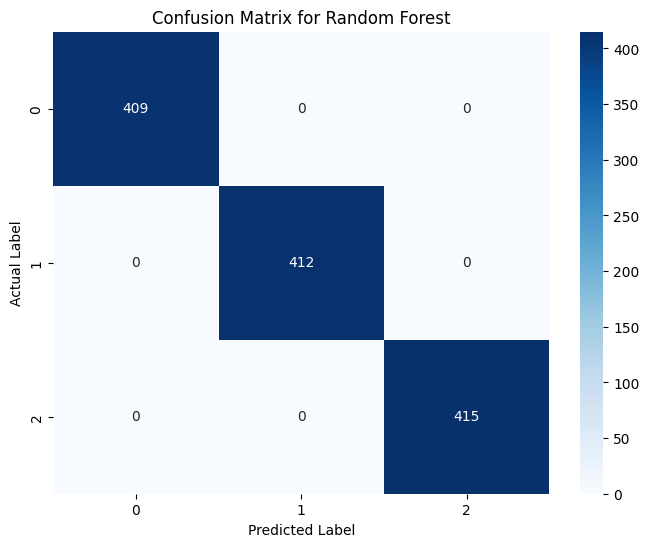

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

# Initialize Random Forest Classifier
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_trian = rf_model.predict(X_train)


# Check the accuracy score
accuracy_rf = accuracy_score(y_train, y_pred_trian)
print("Random Forest Traing Set")
print(f"Random Forest Accuracy: {accuracy_rf * 100: .2f}%")

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_train, y_pred_trian))

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_train, y_pred_trian)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()



 Random Forest Classifier
  Predictions on the testing set

Random Forest Testing Set
Random Forest Testing accuracy:  100.00%

Classification Report on Testing data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       106
           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       100

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309



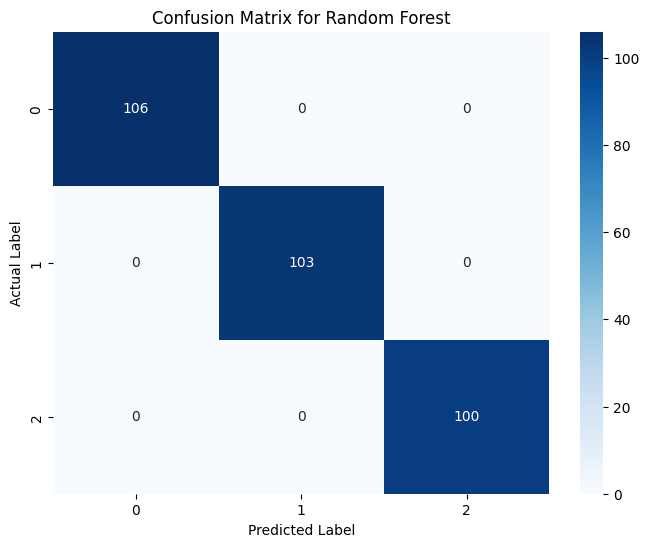

In [27]:
#Prediction on the testing set
y_pred_test = rf_model.predict(X_test)

#Evalute the model on testing data
accuracy_train = accuracy_score(y_test,y_pred_test)
print("Random Forest Testing Set")
print(f"Random Forest Testing accuracy: {accuracy_train * 100: .2f}%")

print("\nClassification Report on Testing data:")
print(classification_report(y_test,y_pred_test))


conf_matrix_rf = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Naive Bayes Classifier

 Predictions on the training set

Naive Bayes Training set Prediction
NB Training Set Accuracy: 100.00%
Naive Bayes Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       409
           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       415

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



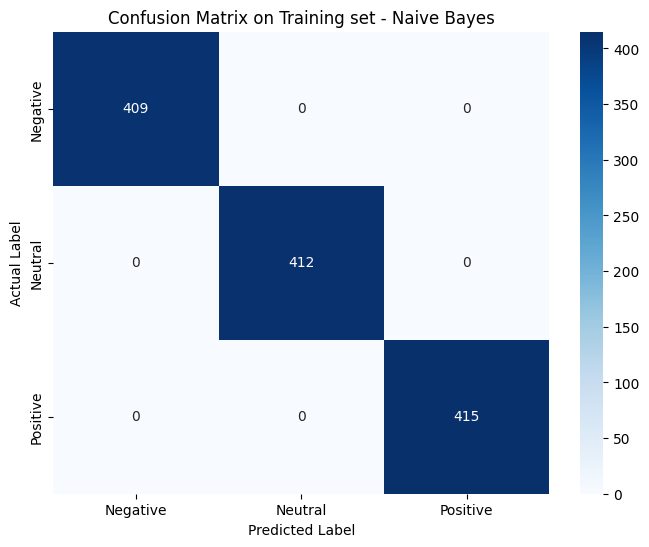

In [28]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes model
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_train)


# Evaluate the model
nb_accuracy = accuracy_score(y_train, y_pred_nb)
print("Naive Bayes Training set Prediction")
print(f'NB Training Set Accuracy: {nb_accuracy * 100:.2f}%')

print("Naive Bayes Classification Report:")
print(classification_report(y_train, y_pred_nb))

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_train, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix on Training set - Naive Bayes')
plt.show()


 Naive Bayes Classifier:
 Predictions on the testing set

Naive Bayes Testing Accuracy:-
Testing Accuracy :  100.00%

Classification Report on Testing data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       106
           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       100

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309



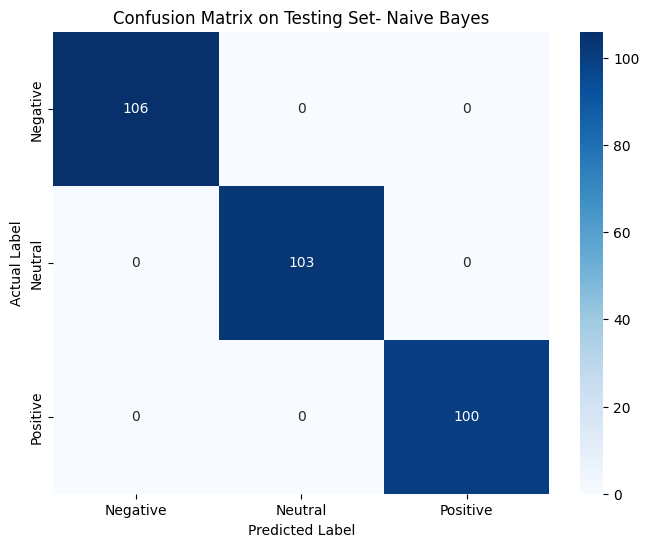

In [29]:
# Prediction on the testing set
y_pred_test =  nb_model.predict(X_test)

#Evalute the model on testing data
accuracy_train = accuracy_score(y_test,y_pred_test)
print("Naive Bayes Testing Accuracy:-")

print(f"Testing Accuracy : {accuracy_train * 100: .2f}%")
# print(f'NB Training Accuracy: {nb_accuracy * 100:.2f}%')

print(f"\nClassification Report on Testing data:")
print(classification_report(y_test,y_pred_test))

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix on Testing Set- Naive Bayes')
plt.show()

# Support Vector Machine (SVM)


Predictions on the training set

SVM Accuracy on Training Set: 100.00%
SVM Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       409
           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       415

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



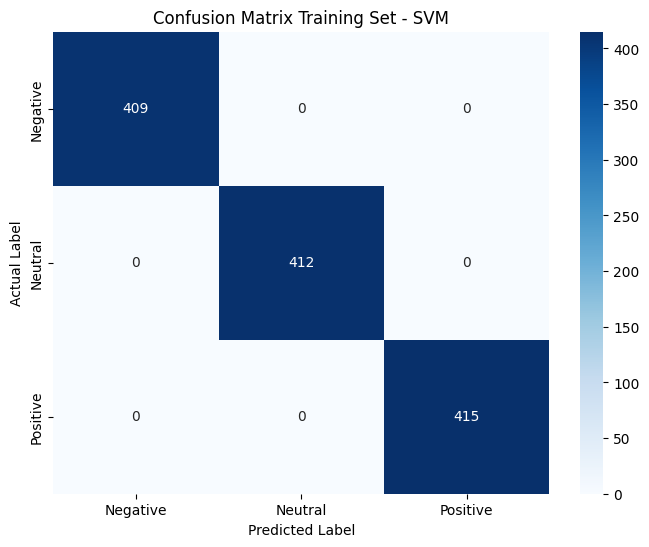

In [30]:
from sklearn.svm import SVC

# Initialize SVM model
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_train = svm_model.predict(X_train)

# Evaluate the model
svm_accuracy = accuracy_score(y_train, y_pred_train)
print(f'SVM Accuracy on Training Set: {svm_accuracy * 100:.2f}%')
print("SVM Classification Report:")
print(classification_report(y_train, y_pred_train))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Training Set - SVM')
plt.show()



Predictions on the testing set

SVM Testing Accuracy 
Testing Accuracy:  100.00%

Classification Report on testing Set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       106
           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       100

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309



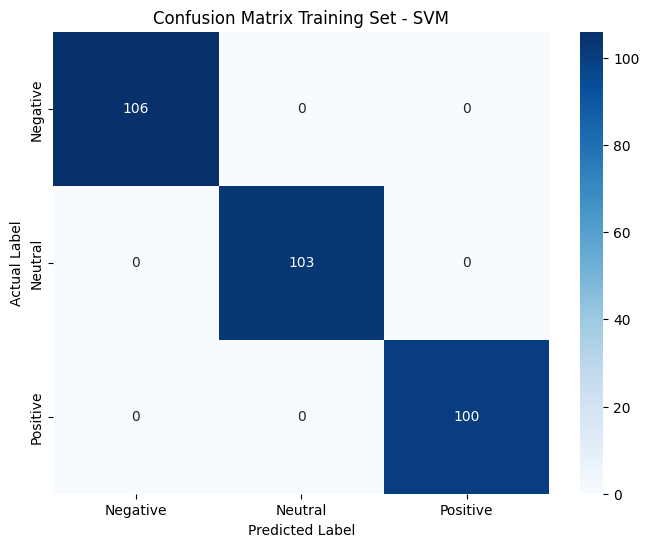

In [31]:
# Predictions on the testing set
y_pred_test = svm_model.predict(X_test)

# Evaluate the model on testing set:
accuracy_train = accuracy_score(y_test,y_pred_test)
print("SVM Testing Accuracy ")
print(f"Testing Accuracy: {accuracy_train * 100: .2f}%")

print("\nClassification Report on testing Set:")
print(classification_report(y_test,y_pred_test))

conf_matrix_svm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Training Set - SVM')
plt.show()


# Logistic Regression - Model

Logistic Regression Prediction Training Set 

Logistic Regression Traning Set:
Training Accuracy: 100.00%

Classification Report on Training data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       409
           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       415

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236


Confusion Matrix on Training data:


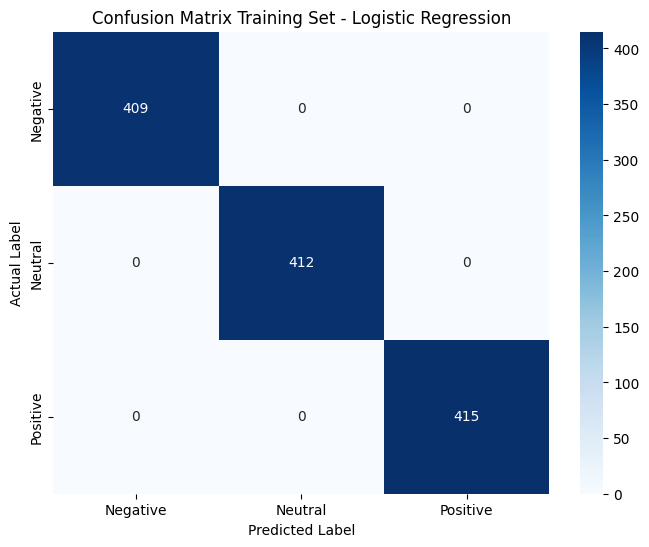

In [41]:
#Logistic Regression model
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predictions on the training set
y_pred_train = logreg_model.predict(X_train)

# Evaluate the model on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Logistic Regression Traning Set:")
print(f"Training Accuracy: {accuracy_train * 100:.2f}%")

print("\nClassification Report on Training data:")
print(classification_report(y_train, y_pred_train))

print("\nConfusion Matrix on Training data:")


conf_matrix_Logistic_Regression = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_Logistic_Regression, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Training Set - Logistic Regression')
plt.show()

Logistic Regression Prediction Testing Set

Logistic Regression Testing Set Accuracy 
Testing Accuracy:  100.00%

Classification Report on testing Set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       106
           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       100

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309



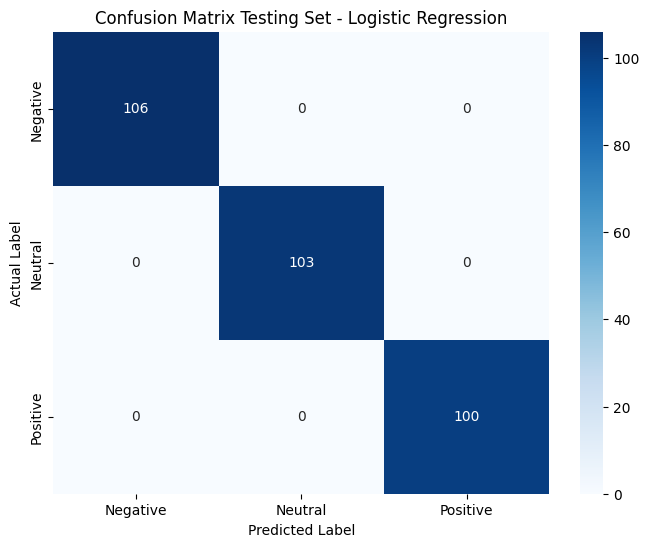

In [42]:
y_pred_test = logreg_model.predict(X_test)

# Evaluate the model on testing set:
accuracy_train = accuracy_score(y_test,y_pred_test)
print("Logistic Regression Testing Set Accuracy ")
print(f"Testing Accuracy: {accuracy_train * 100: .2f}%")

print("\nClassification Report on testing Set:")
print(classification_report(y_test,y_pred_test))

conf_matrix_Logistic_Regression = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_Logistic_Regression, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Testing Set - Logistic Regression')
plt.show()

# Representation of Results

In [ ]:
# Multiple models

results_data = {'Model': ['Random Forrest','Naive Bayes','Support Vector machine(SVM)','Logistic Regression'],
                'Accuracy': [1.00,1.00,1.00,1.00],
                'Precision': [1.00,1.00,1.00,1.00],
                'Recall' : [1.00,1.00,1.00,1.00],
                'F1 Score' : [1.00,1.00,1.00,1.00],
                }

df_results = pd.DataFrame(results_data)

# Display the DataFrame:
print(df_results)

                         Model  Accuracy  Precision  Recall  F1 Score
0               Random Forrest       1.0        1.0     1.0       1.0
1                  Naive Bayes       1.0        1.0     1.0       1.0
2  Support Vector machine(SVM)       1.0        1.0     1.0       1.0
3          Logistic Regression       1.0        1.0     1.0       1.0


# Cross-Validation on Random Forest Model

In [46]:
from sklearn.model_selection import cross_val_score

#Random Forrest model
random_f_model = RandomForestClassifier()

# Perform 5-fold cross-validation on trainig data
cv_scores_train = cross_val_score(rf_model,X_train, y_train, cv=5, scoring='accuracy')

#Perform 5-fold cross-validation on testing data:
cv_score_test = cross_val_score(rf_model,X_test, y_test, cv=5, scoring='accuracy')

#Displaying cross-validation scores
print("Cross-Validation Scores on Training Data:",cv_scores_train)
print("Mean Accuracy on Training Data:",cv_scores_train.mean())

print("\nCross-Validation Score on Testing Data:",cv_score_test)
print("Mean Accuracy on Testing Data:", cv_score_test.mean())

Cross-Validation Scores on Training Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Training Data: 1.0

Cross-Validation Score on Testing Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Testing Data: 1.0


Cross-Validation on Naive Bayes

In [47]:
# Naive Bayes model
nb_model = MultinomialNB()

# Perform 5-fold cross-validation on training data
cv_scores_train = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')

# Perform 5-fold cross-validation on testing data
cv_scores_test = cross_val_score(nb_model, X_test, y_test, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores on Training Data:", cv_scores_train)
print("Mean Accuracy on Training Data:", cv_scores_train.mean())

print("\nCross-Validation Scores on Testing Data:", cv_scores_test)
print("Mean Accuracy on Testing Data:", cv_scores_test.mean())

Cross-Validation Scores on Training Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Training Data: 1.0

Cross-Validation Scores on Testing Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Testing Data: 1.0


Cross-Validation on Support Vector Machine Model

In [48]:
# Support Vector Machine model
svm_model = SVC()

# Perform 5-fold cross-validation on training data
cv_scores_train = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Perform 5-fold cross-validation on testing data
cv_scores_test = cross_val_score(svm_model, X_test, y_test, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores on Training Data:", cv_scores_train)
print("Mean Accuracy on Training Data:", cv_scores_train.mean())

print("\nCross-Validation Scores on Testing Data:", cv_scores_test)
print("Mean Accuracy on Testing Data:", cv_scores_test.mean())

Cross-Validation Scores on Training Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Training Data: 1.0

Cross-Validation Scores on Testing Data: [1. 1. 1. 1. 1.]
Mean Accuracy on Testing Data: 1.0


# Analysis the test data:

In [59]:
# Create a DataFrame using the test set (X_test)
analysis_df = pd.DataFrame(X_test.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add the actual sentiment labels (y_test) and predicted sentiment labels (y_pred)
analysis_df['y_test'] = y_test.values
analysis_df['y_pred_test'] = y_pred_test

# Save the analysis results to a CSV file
analysis_df.to_csv(r"C:\Users\viren\OneDrive\Desktop\IIT-MADARAS(GUVI)\Sentiment Analysis HealthCare\NLP-Sentiment-Analysis-on-Healthcare-Reviews\analysis.csv", index=False)

print("Analysis results saved to analysis.csv")


Analysis results saved to analysis.csv


# Model Evaluation

# Sentiment Distribution

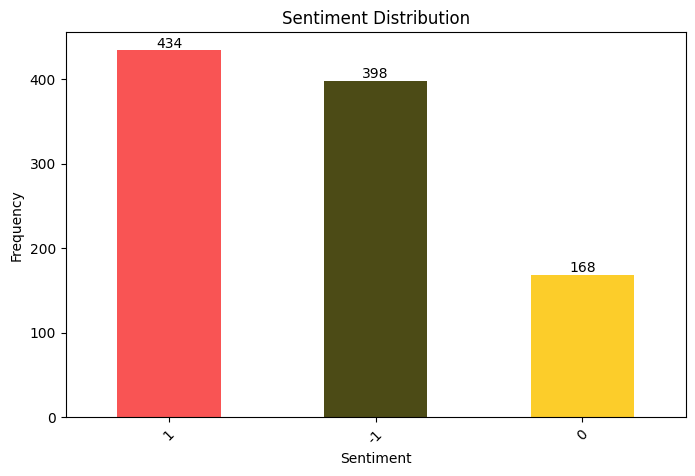

In [67]:
# Sentiment distribution
sentiment_counts = y.value_counts()



plt.figure(figsize=(8,5))
ax = sentiment_counts.plot(kind='bar', color=['#F95454', '#4C4B16', '#FCCD2A'])

# Adding frequency values on top of each bar
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.1, str(v), ha = 'center', va='bottom')

plt.title('Sentiment Distribution')
plt.ylabel('Frequency')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)
plt.show()

# Visualization of Results

Unique Sentiment Values: [ 1  0 -1]


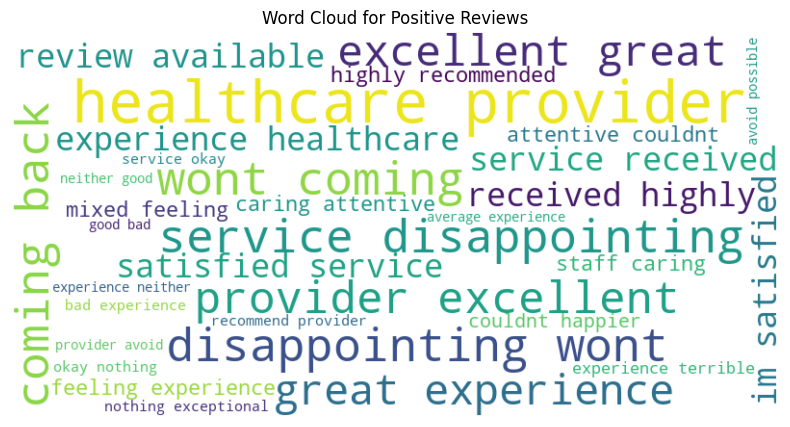

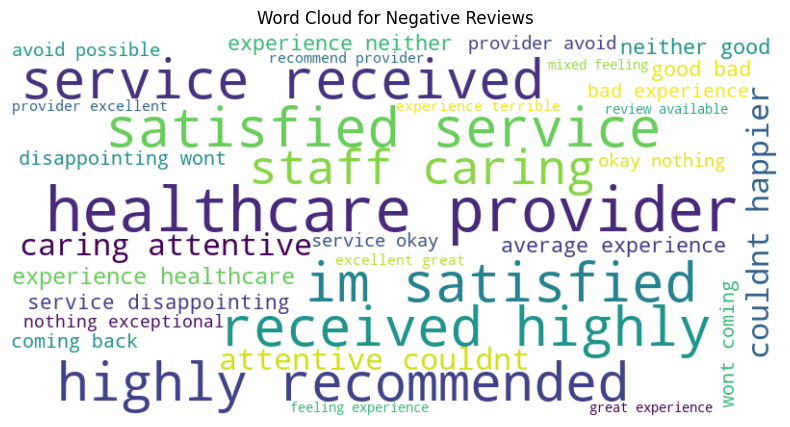

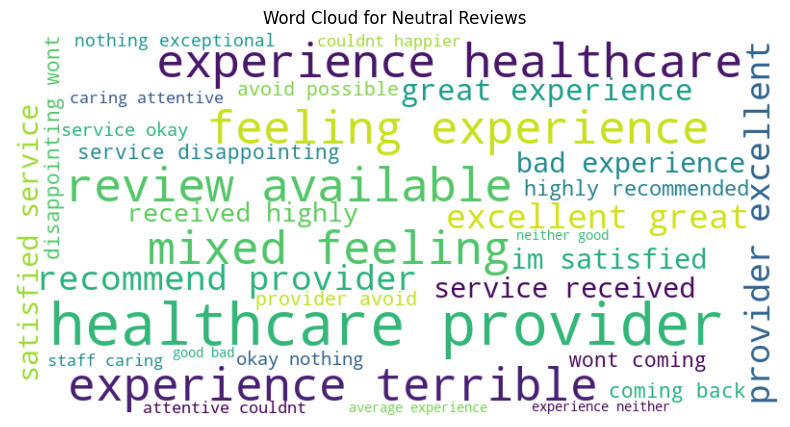

In [ ]:
from wordcloud import WordCloud


# Ensure the sentiment mapping is correct
df.loc[df['Rating'] > 3, 'Sentiment'] = 1
df.loc[df['Rating'] == 3, 'Sentiment'] = 0
df.loc[df['Rating'] < 3, 'Sentiment'] = -1

# Check the unique values in the Sentiment column
print("Unique Sentiment Values:", df['Sentiment'].unique())

# Join positive and negative reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 1]['cleaned_review'])
negative_reviews = ' '.join(df[df['Sentiment'] == -1]['cleaned_review'])
neutral_reviews = ' '.join(df[df['Sentiment'] == 0]['cleaned_review'])

# Check if there are reviews to generate word clouds
if positive_reviews:
    # Word Cloud for Positive Sentiments
    wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Positive Reviews')
    plt.show()


if negative_reviews:
    # Word Cloud for Negative Sentiments
    wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Negative Reviews')
    plt.show()


if neutral_reviews:
    # Word Cloud for Neutral Sentiments
    wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_neutral, interpolation='bilinear')

    plt.axis('off')
    plt.title('Word Cloud for Neutral Reviews')
    plt.show()


In [49]:
df.head()

,Review_Text,Rating,cleaned_review,Sentiment_Polarity,Sentiment
0,I have mixed feelings about my experience.,4,mixed feeling experience,0.0,0
1,The staff was caring and attentive. I couldn't...,5,staff caring attentive couldnt happier,0.4,1
2,I have mixed feelings about my experience.,5,mixed feeling experience,0.0,0
3,I have mixed feelings about my experience.,5,mixed feeling experience,0.0,0
4,The healthcare provider was excellent. I had a...,3,healthcare provider excellent great experience,0.9,1


# Count word frequencies

In [54]:
from collections import Counter
# Count word frequencies
word_freq = Counter([word for tokens in df['cleaned_review'].apply(str.split) for word in tokens])

# top 10 recurring words
top_10_words = word_freq.most_common(10)

# Print the results
print("Top 10 Recurring Words:")
for word, count in top_10_words:
    print(f"{word}")

Top 10 Recurring Words:
experience
service
provider
healthcare
bad
im
satisfied
received
highly
recommended


In [56]:
from sklearn.feature_extraction.text import CountVectorizer

countvectorizer = CountVectorizer()

x_cv = countvectorizer.fit_transform(X)

In [57]:
dataset_analysis = pd.DataFrame(x_cv.toarray(), columns=countvectorizer.get_feature_names_out())
dataset_analysis['Sentiment']=y

In [ ]:
dataset_analysis.shape

(1000, 37)

# Positive Sentiment Analysis

In [60]:
df_pos=dataset_analysis.query("Sentiment==1")
positive_df=pd.DataFrame()
positive_df['Words']=list(df_pos.iloc[:, :-1].columns)
positive_df['Frequency']=df_pos.iloc[:, :-1].sum().values
positive_df = positive_df.sort_values(by='Frequency',ascending=False)
positive_df.head()

,Words,Frequency
31,service,208
18,highly,117
30,satisfied,117
28,recommended,117
26,received,117


# Negative Sentiment Analysis

In [61]:
df_neg=dataset_analysis.query("Sentiment==-1")
negative_df=pd.DataFrame()
negative_df['Words']=list(df_neg.iloc[:, :-1].columns)
negative_df['Frequency']=df_neg.iloc[:, :-1].sum().values
negative_df = negative_df.sort_values(by='Frequency',ascending=False)
negative_df.head()

,Words,Frequency
12,experience,281
25,provider,187
5,bad,184
31,service,106
9,disappointing,106


# Neutral Sentiment Analysis

In [62]:
df_neu=dataset_analysis.query("Sentiment==0")
neutral_df=pd.DataFrame()
neutral_df['Words']=list(df_new.iloc[:, :-1].columns)
neutral_df['Frequency']=df_new.iloc[:, :-1].sum().values
neutral_df = negative_df.sort_values(by='Frequency',ascending=False)
neutral_df.head()

,Words,Frequency
12,experience,281
25,provider,187
5,bad,184
31,service,106
9,disappointing,106


# Insights:
# Most frequently used words:

Top 10 Recurring Words:

experience
service
provider
healthcare
bad
im
satisfied
received
highly
recommended
Positive Reviews : Customers are highly satisfied and recommend the service.

service 208
highly 117
satisfied 117
recommended 117
received 117
Positive reviews :

Negative Reviews : Customers had a bad, disappointing experience and service.

experience 281
provider 187
bad 184
service 106
disappointing 106
Negative reviews :

Neutral Reviews : Customers had a bad, disappointing experience and service.

experience 281
provider 187
bad 184
service 106
disappointing 106